## **Lavorare con i file**
La funzione open() serve per aprire un file e ottenere un oggetto file che può essere utilizzato per leggere o scrivere.

La sua sintassi di base è la seguente:

In [ ]:
open(file, mode, [encoding], [errors])

#Esempi:
# Aprire un file in modalità lettura
myfile = open("miofile.txt", "r")

# Aprire un file in modalità scrittura
myfile = open("nuovofile.txt", "w")

# Aprire un file binario in modalità lettura
myfile = open("filebinario.bin", "rb")

# Aprire un file di testo con specifico encoding e gestione degli errori
myfile = open("testo.txt", "r", encoding="utf-8", errors="replace")

contenuto = myfile.read()  # Legge tutto il contenuto del file
linea = myfile.readline()  # Legge una singola linea
linee = myfile.readlines()  # Legge tutte le linee e le restituisce come lista
myfile.close() # per chiudere il file

* **file**: percorso del file, può essere una stringa o un oggetto di tipo pathlib.Path.

* **mode**: specifica la modalità in cui il file deve essere aperto e può essere una delle seguenti stringhe:

* '**r**': aperto solo per la lettura.
* '**w**': aperto per la scrittura e sovrascriverà il contenuto esistente o creerà un nuovo file se non esiste.
* '**a**': aperto per la scrittura, ma aggiungerà i dati alla fine del file senza cancellare il contenuto esistente.
* '**b**': Utilizzato con le modalità 'r', 'w', o 'a' per indicare che il file deve essere trattato come file binario (ad esempio, 'rb' per lettura binaria).
* '**t**' (default): Utilizzato con le modalità 'r', 'w', o 'a' per indicare che il file deve essere trattato come file di testo (ad esempio, 'rt' per lettura di testo).
* **encoding** (opzionale): Questo parametro specifica l'encoding dei dati nel file e dovrebbe essere specificato se stai lavorando con file di testo. Ad esempio, 'utf-8', 'ascii', ecc.
* **errors** (opzionale): Questo parametro specifica come gestire gli errori di codifica se l'encoding è specificato. Il valore predefinito è 'strict': solleva un'eccezione UnicodeError in caso di errori di codifica. 'ignore': Ignora i caratteri non validi durante la codifica o decodifica.'replace': Sostituisce i caratteri non validi con il carattere di sostituzione U+FFFD (�). 'xmlcharrefreplace': Sostituisce i caratteri non validi con le entità XML.'backslashreplace': Sostituisce i caratteri non validi con sequenze di escape in stile backslash.

Al termine dell'utilizzo il file va chiuso tramite il metodo **close()**  per rilasciare le risorse e consentire l'accesso ad altri processi.
In alternativa si aprire il file utilizzando il blocco **with** per *garantire la chiusura automatica del file alla fine del suo utilizzo*:

In [ ]:
with open("miofile.txt", "r") as file:
    # Fai qualcosa con il file
# Il file è chiuso automaticamente fuori dal blocco with


**1) Scaricare una serie di URL e salvare il contenuto in un file**

Implementa e commenta ... il seguente codice:


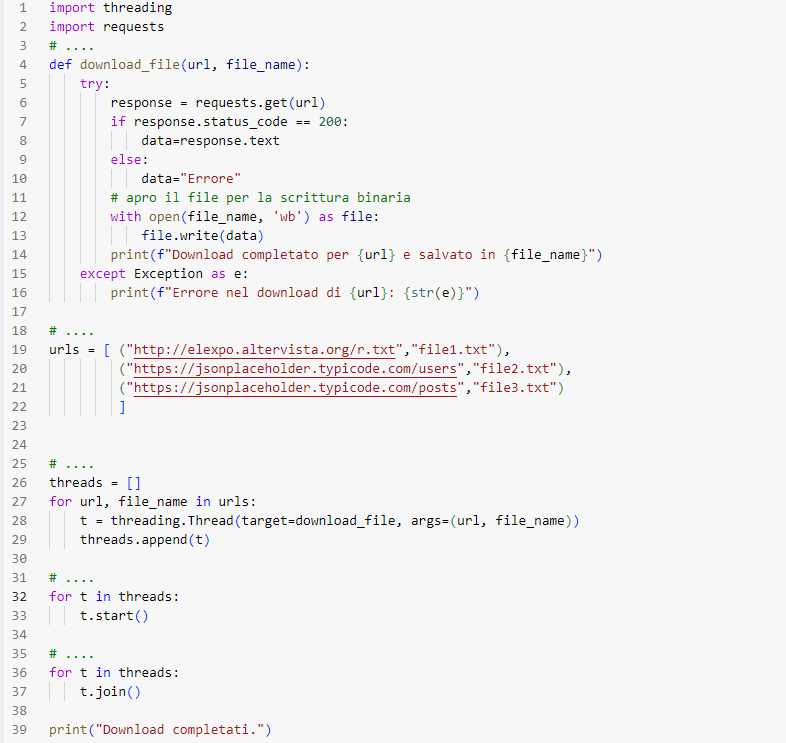

In [ ]:

import threading
import requests

# con questa funzione dico chiedo di installare i file
# tramite il link che provvedo


def download_file(url, file_name):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.text
        else:
            data = "ERRORE"
        # faccio aprire il file in scrittura binaria
        with open(file_name, "wb") as file:
            print(f"Download completato per {url} e salvato in {file_name}")
    except Exception as e:
        print(f"Errore nel download di {url}: {str(e)}")


# lista di siti dove si trovano i file da scaricare

urls = [
    ("http://elexpo.altervista.org/r.txt", "file1.txt"),
    ("http://https://jsonplaceholder.typicode/users", "file2.txt"),
    ("http://https://jsonplaceholder.typicode/post", "file3.txt"),
]

# scarico i file
threads = []
for url, file_name in urls:
    t = threading.Thread(target=download_file, args=(url, file_name))
    threads.append(t)

# si fanno partitre i threads
for t in threads:
    t.start()

# si fa partire il download di ogni file
for t in threads:
    t.join()

print("Download completati")


**1.1) (Versione serie) Scaricare una serie di URL e salvare il contenuto in un file**, registra i tempi di esecuzione, confrontali con i tempi dell'esecuzione con i thread e commenta il risultato.

In [ ]:
from asyncio import Queue
from threading import Thread
import time


def worker():
    while True:
        addres=task_queue.get()
        ping_website(addres)
        task_queue.task_done()

def ping_website(address):
    try:
        request=request.get(address, timeout=10)
        if Queue.status_code>=400:
            print(f"Indirizzo {address} pingato con status code {Queue.status_code}")
            raise Exception
    except:
        print("Errore nel contattatre l'url")


WEBSITE_LIST = [
    "https://envato.com",
    "http://amazon.com",
    "http://facebook.com",
    "http://google.com",
    "http://google.fr",
    "http://google.es",
    "http://internet.org",
    "http://gmail.com",
    "http://stackoverflow.com",
    "http://github.com",
    "http://heroku.com",
    "http://really-cool-available-domain.com",
    "http://djangoproject.com",
    "http://rubyonrails.org",
    "http://basecamp.com",
    "http://trello.com",
    "http://yiiframework.com",
    "http://shopify.com",
    "http://another-really-interesting-domain.co",
    "http://airbnb.com",
    "http://instagram.com",
    "http://snapchat.com",
    "http://youtube.com",
    "http://baidu.com",
    "http://yahoo.com",
    "http://live.com",
    "http://linkedin.com",
    "http://yandex.ru",
    "http://netflix.com",
    "http://wordpress.com",
    "http://bing.com",
    "http://jessesteahouse.com",
]
NUM_WORKES=21
task_queue=Queue()
start_time=time.time()

#thrads=[threads(target=worker) for _ in range(NUM_WORKERS)]

for n in range(NUM_WORKES):
    t=Thread(target=worker)
    threads.append(t)   

[task_queue.put(address) for thread in threads]
for address in WEBSITE_LIST():
    task_queue.put(address)
    
task_queue.join()
end_time=time.time
pritn("Tempo di esecuione: ", end_time-start_time)

**1.2)(Versione serie + thread)** Scaricare almeno 20 URL utilizzando solo 4 thread (e non un thread per ogni url come nella versione precedente); salvare il contenuto in un file, registra i tempi di esecuzione, confronta i tempi di esecuzione e commenta il risultato

In [ ]:
from asyncio import Queue
from threading import Thread
import time


def worker():
    while True:
        addres=task_queue.get()
        ping_website(addres)
        task_queue.task_done()

def ping_website(address):
    try:
        request=request.get(address, timeout=10)
        if Queue.status_code>=400:
            print(f"Indirizzo {address} pingato con status code {Queue.status_code}")
            raise Exception
    except:
        print("Errore nel contattatre l'url")


WEBSITE_LIST = [
    "https://envato.com",
    "http://amazon.com",
    "http://facebook.com",
    "http://google.com",
    "http://google.fr",
    "http://google.es",
    "http://internet.org",
    "http://gmail.com",
    "http://stackoverflow.com",
    "http://github.com",
    "http://heroku.com",
    "http://really-cool-available-domain.com",
    "http://djangoproject.com",
    "http://rubyonrails.org",
    "http://basecamp.com",
    "http://trello.com",
    "http://yiiframework.com",
    "http://shopify.com",
    "http://another-really-interesting-domain.co",
    "http://airbnb.com",
    "http://instagram.com",
    "http://snapchat.com",
    "http://youtube.com",
    "http://baidu.com",
    "http://yahoo.com",
    "http://live.com",
    "http://linkedin.com",
    "http://yandex.ru",
    "http://netflix.com",
    "http://wordpress.com",
    "http://bing.com",
    "http://jessesteahouse.com",
]
NUM_WORKES=4
task_queue=Queue()
start_time=time.time()

#thrads=[threads(target=worker) for _ in range(NUM_WORKERS)]

for n in range(NUM_WORKES):
    t=Thread(target=worker)
    threads.append(t)   

[task_queue.put(address) for thread in threads]
for address in WEBSITE_LIST():
    task_queue.put(address)
    
task_queue.join()
end_time=time.time
pritn("Tempo di esecuione: ", end_time-start_time)

## Lavorare con le directory

Modulo **os**:  fornisce una vasta gamma di funzionalità per interagire con il sistema operativo, inclusa la gestione delle directory.


In [ ]:
import os
os.mkdir("nuova_cartella")  #creazione di una directory
os.rmdir("cartella_da_elimare") #elimina una directory
os.chdir("/percorso/nuova_directory") #cambiare directory
files = os.listdir("/percorso/directory") #listare i file in una directory:
if os.path.exists("/percorso/directory"): #verifica dell'esistenza di una directory
    print("La directory esiste.")
percorso_assoluto = os.getcwd() # currunt work directory = percorso assoluto della cartella in cui lo script è stato avviato.
print("Percorso assoluto della cartella di lavoro:", percorso_assoluto)

Modulo **os.path**: fornisce funzioni per la manipolazione dei percorsi dei file

In [ ]:
import os.path
path = os.path.join("percorso", "directory") #unisce i componenti di un percorso in un unico percorso valido
nome_file = os.path.basename("/percorso/directory/file.txt") #restituisce il nome del file (file.txt)
estensione_file = os.path.splitext("file.txt") #restituisce l'estensione del file (.txt)

**2) Scaricare una serie di url, analizzare il contenuto e poi salvarli in due cartelle distinte, se il file contiene una parola scelta dall'utente viene salvato nella cartella "ok" altrimenti nella cartella "ko". La parola da cercare ed i nomi delle due cartelle vengono inseriti dall'utente.**


In [ ]:
import threading
import request
import os

# Funzione per il download, l'analisi e il salvataggio dei file
def download_and_analyze(urls, ok_word, save_dir_ok, save_dir_ko):
    try:
      #.....
    except Exception as e:
        print(f"Errore nel download e salvataggio di {url}: {str(e)}")

#....

print("Download e analisi completati.")

In [ ]:

import threading
import requests
import os

os.mkdir("ok")
os.mkdir("ko")


def download_and_analyze(urls, ok_word, save_dir_ok, save_dir_ko):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            if save_dir_ok:
                os.chdir("/percorso/ok")
            else:
                os.chdir("/percorso/ko")
        else:
            data = "ERRORE"
    except Exception as e:
        print(f"Erorre nel download e salvataggio di {url}: {str(e)}")


urls = [
    ("http://elexpo.altervista.org/r.txt", "file1.txt"),
    ("http://https://jsonplaceholder.typicode/users", "file2.txt"),
    ("http://https://jsonplaceholder.typicode/post", "file3.txt"),
]

while True:
    ok_word = input("Inserire il ok o ko:\n>")
    if ok_word == "ok" or ok_word == "ko":
        break
    else:
        print("Inserire ")

if ok_word == "ok":
    save_dir_ok = True
    save_dir_ko = False
else:
    save_dir_ok = False
    save_dir_ko = True

download_and_analyze(
    urls,
    ok_word,
)

print("Download e analisi completati.")


**3) Scaricare una serie di url, analizzare il contenuto e poi salvarli in tre cartelle distinte, : small,medium, large in base al numero di caratteri contenuti nel file. Se il file ha meno di 2000 caratteri viene salvato nella cartella small, se ne ha da 2000 a 8000 nella cartella medium, altrimenti nella large. Le cartelle devono essere delle sottocartelle della cartella che contiene lo script.**


In [ ]:

import threading
import requests
import os


def download_file(url, file_name):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.text
            file = open("file_name.txt", "r")
            contenuto = file.read
            if contenuto < 2000:
                os.mkdir("small")
                os.chdir("/file/small")
            elif contenuto < 4000:
                os.mkdir("medium")
                os.chdir("/file/medium")
            else:
                os.mkdir("large")
                os.chdir("/file/large")

        else:
            data = "ERRORE"
            print(f"Download completato per {url} e salvato in {file_name}")
    except Exception as e:
        print(f"Errore nel download di {url}: {str(e)}")


# lista di siti dove si trovano i file da scaricare

urls = [
    ("http://elexpo.altervista.org/r.txt", "file1.txt"),
    ("http://https://jsonplaceholder.typicode/users", "file2.txt"),
    ("http://https://jsonplaceholder.typicode/post", "file3.txt"),
]

# scarico i file
threads = []
for url, file_name in urls:
    t = threading.Thread(target=download_file, args=(url, file_name))
    threads.append(t)

# si fanno partitre i threads
for t in threads:
    t.start()

# si fa partire il download di ogni file
for t in threads:
    t.join()

print("Download completati")